# Regression Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
%matplotlib inline

# Does shoe size depend on height?

In [7]:
shoes = pd.read_csv('/users/elizabeth/downloads/shoes.csv')

Text(0.5,1,'Shoe Size by Height')

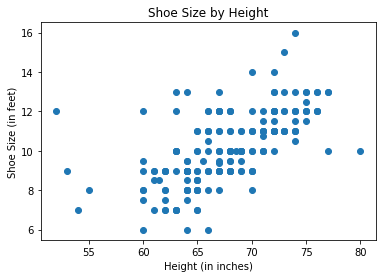

In [8]:
plt.scatter(shoes['HEIGHT (IN)'], shoes['SHOE SIZE (FT)'])
plt.xlabel('Height (in inches)')
plt.ylabel('Shoe Size (in feet)')
plt.title('Shoe Size by Height')

In [9]:
#computing the correlation coefficient using the long method:

In [10]:
def standardize(anylist):
    '''convert any array of numbers to std units '''
    return (anylist - np.mean(anylist)) / np.std(anylist) 

In [11]:
standardize_x = standardize(shoes['HEIGHT (IN)'])
standardize_y = standardize(shoes['SHOE SIZE (FT)'])

In [12]:
#correlation coefficient r
r = np.mean(standardize_x * standardize_y)
r

0.6221982612753523

In [13]:
#computing the correlation coefficient using np.corrcoef()
np.corrcoef(shoes['HEIGHT (IN)'], shoes['SHOE SIZE (FT)'])

array([[1.        , 0.62219826],
       [0.62219826, 1.        ]])

Text(0,0.5,'Shoe Size (in feet)')

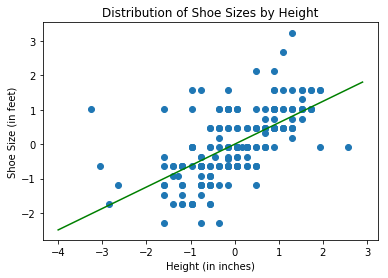

In [14]:
#fitting a linear regression line

plt.scatter(standardize_x, standardize_y) #graphs the scatter plot of data
xvals = np.arange(-4, 3, 0.3) #setting the range of x values for regression line
yvals = r * xvals #the regression y values (correlation coefficient * x values)
plt.plot(xvals, yvals, color = 'g') #graphing the linear regression
plt.title('Distribution of Shoe Sizes by Height')
plt.xlabel('Height (in inches)')
plt.ylabel('Shoe Size (in feet)')

In [15]:
#predicting shoe size

In [16]:
m, b = np.polyfit(shoes['HEIGHT (IN)'], shoes['SHOE SIZE (FT)'], 1)

In [17]:
m, b

(0.2337014136204536, -5.667964282283006)

In [18]:
# predicting using the linear regression: y = mx + b
# My height: 63 inches
my_height = 63

In [19]:
my_shoe_size = (m * my_height) + b
my_shoe_size

9.05522477580557

- My actual shoe size is an 8. The model is off by about a size. 

# Testing Chebychev's Inequality

As per Chebychev's inequality, as least 88.88% of the data should be within 3 standard deviations of the mean. Is that true for this dataset?

In [20]:
delays = pd.read_excel('/users/elizabeth/downloads/flightdelays.xlsx')
delays.shape

(49, 31)

In [21]:
#cleaning data
delays = delays.dropna(subset=['ARRIVAL_DELAY'])
delays.shape

(47, 31)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

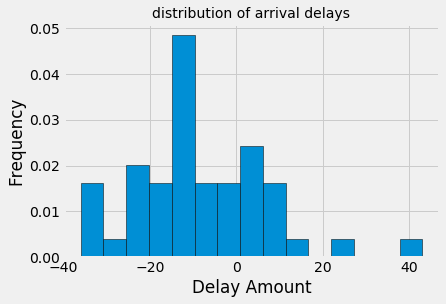

In [22]:
plt.style.use('fivethirtyeight')
plt.hist(delays['ARRIVAL_DELAY'], normed = True, bins = 15, ec = 'k')
plt.title('distribution of arrival delays', size = 'medium')
plt.xlabel('Delay Amount')
plt.ylabel('Frequency')

- As per Chebychev's inequality, as least 88.88% of the data should be within 3 standard deviations of the mean...

In [23]:
standardized_delays = (delays['ARRIVAL_DELAY'] - np.mean(delays['ARRIVAL_DELAY'])) / np.std(delays['ARRIVAL_DELAY'])

In [24]:
upper_bound = np.mean(delays['ARRIVAL_DELAY']) + 3 * np.std(delays['ARRIVAL_DELAY'])
lower_bound = np.mean(delays['ARRIVAL_DELAY']) - 3 * np.std(delays['ARRIVAL_DELAY'])
within_3_SDs = np.sum(np.logical_and(delays['ARRIVAL_DELAY'] < upper_bound, delays['ARRIVAL_DELAY'] > lower_bound))
print(within_3_SDs / len(delays) * 100)

97.87234042553192


- Yes, Chebychev's inequality is true for this dataset. 

In [25]:
# Determining which airline to avoid...

In [26]:
grouped_delays = delays.groupby(['AIRLINE'], as_index=False)
grouped_delays.agg({'ARRIVAL_DELAY' : 'mean'}).sort_values('ARRIVAL_DELAY', ascending = False)

,AIRLINE,ARRIVAL_DELAY
4,HA,15.000000
2,B6,2.000000
5,NK,1.000000
0,AA,-8.250000
6,UA,-9.666667
3,DL,-10.400000
7,US,-16.400000
1,AS,-17.000000


- Based on this data alone, it would be a good idea to avoid Hawaii Airlines (HA) because it has the highest average of delay time. 

# NFL data!

The NFL players data has the heights and weights of some players in the NFL. It also tells you what position they play in.

Things I want to do:

1. Plotting a histogram of the heights. Does this seem normally distributed? What is the mean? What is the median? Are there any significant outliers?

2. Plotting a histogram of the weights. Does this seem normally distributed? What is the mean? What is the median? Are there any significant outliers?

3. Question: does the distribution of weights depend on the position?

#### 1: Heights

In [30]:
nfl = pd.read_csv('/users/elizabeth/downloads/nfl_players.csv', encoding='latin-1')
nfl.head()

,Jersey,Name,Position,Age,Height,Weight,Years,College,Team,Position Group,Side,Level
0,5,Donte Deayon,DB,22,69,150,0,Boise State,New York Giants,DB,DEF,Rookie
1,--,Chris Hubert,WR,23,69,155,0,Fayetteville State,Arizona,WR,OFF,Rookie
2,14,J.J. Nelson,WR,24,70,160,2,UAB,Arizona,WR,OFF,1-4 Yrs
3,5,Cairo Santos,PK,24,68,160,3,Tulane,Kansas City,ST,ST,1-4 Yrs
4,37,Nickell Robey,CB,24,68,165,4,USC,Buffalo,DB,DEF,1-4 Yrs


Text(0,0.5,'Frequency')

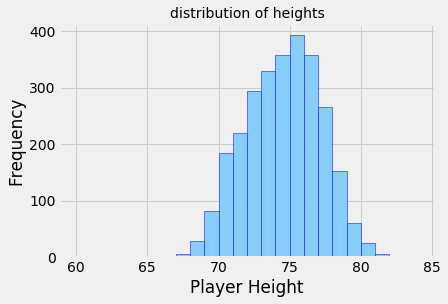

In [31]:
#Plot a histogram of the heights.
plt.hist(nfl['Height'], bins = np.arange(60, 85), ec = 'blue', color = 'lightskyblue')
plt.title('distribution of heights', size = 'medium')
plt.xlabel('Player Height')
plt.ylabel('Frequency')

- The distribution looks vaguely but not quite normal. 

In [32]:
# Mean?
np.mean(nfl['Height'])

74.01338639652677

- The mean height of NFL players is 74.013

In [33]:
# Median?
np.median(nfl['Height'])

74.0

- The median height of NFL players is 74

In [34]:
# Outliers?
np.max(nfl['Height']), np.min(nfl['Height'])

(81, 61)

- The minimum and maximum values are not significant enough to be outliers.

#### 2: Weights

Text(0,0.5,'frequency')

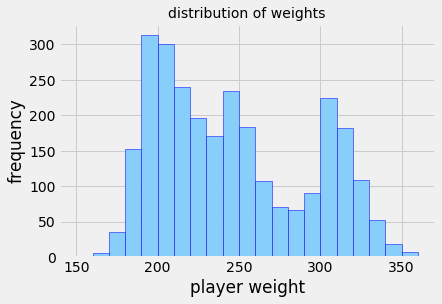

In [35]:
#Plot a histogram of the weights.
plt.hist(nfl['Weight'], bins = np.arange(150, 370, 10), ec = 'blue', color = 'lightskyblue')
plt.title('distribution of weights', size = 'medium')
plt.xlabel('player weight')
plt.ylabel('frequency')

- The distribution of weights is not normal. 

In [36]:
# Mean?
np.mean(nfl['Weight'])

244.81693198263386

In [37]:
# Median?
np.median(nfl['Weight'])

236.0

In [38]:
# Outliers?
np.max(nfl['Weight']), np.min(nfl['Weight'])

(364, 150)

In [39]:
nfl[['Weight']].sort_values('Weight', ascending=True)[:5]

,Weight
0,150
1,155
2,160
3,160
4,165


In [40]:
nfl[['Weight']].sort_values('Weight', ascending=False)[:5]

,Weight
2763,364
2762,359
2761,355
2760,354
2759,352


- There seem to be no significantly large outliers because the data for both ends of the weight spectrum seem to be gradually increasing/decreasing.

### Does the distribution of weights depend on the position?

In [41]:
nfl.columns

Index(['Jersey', 'Name', 'Position', 'Age', 'Height', 'Weight', 'Years',
       'College', 'Team', 'Position Group', 'Side', 'Level'],
      dtype='object')

In [42]:
weight_position = nfl[['Position', 'Weight']]
weight_position.head()

,Position,Weight
0,DB,150
1,WR,155
2,WR,160
3,PK,160
4,CB,165


In [43]:
# Histogramming the Distributions of Weights per Position

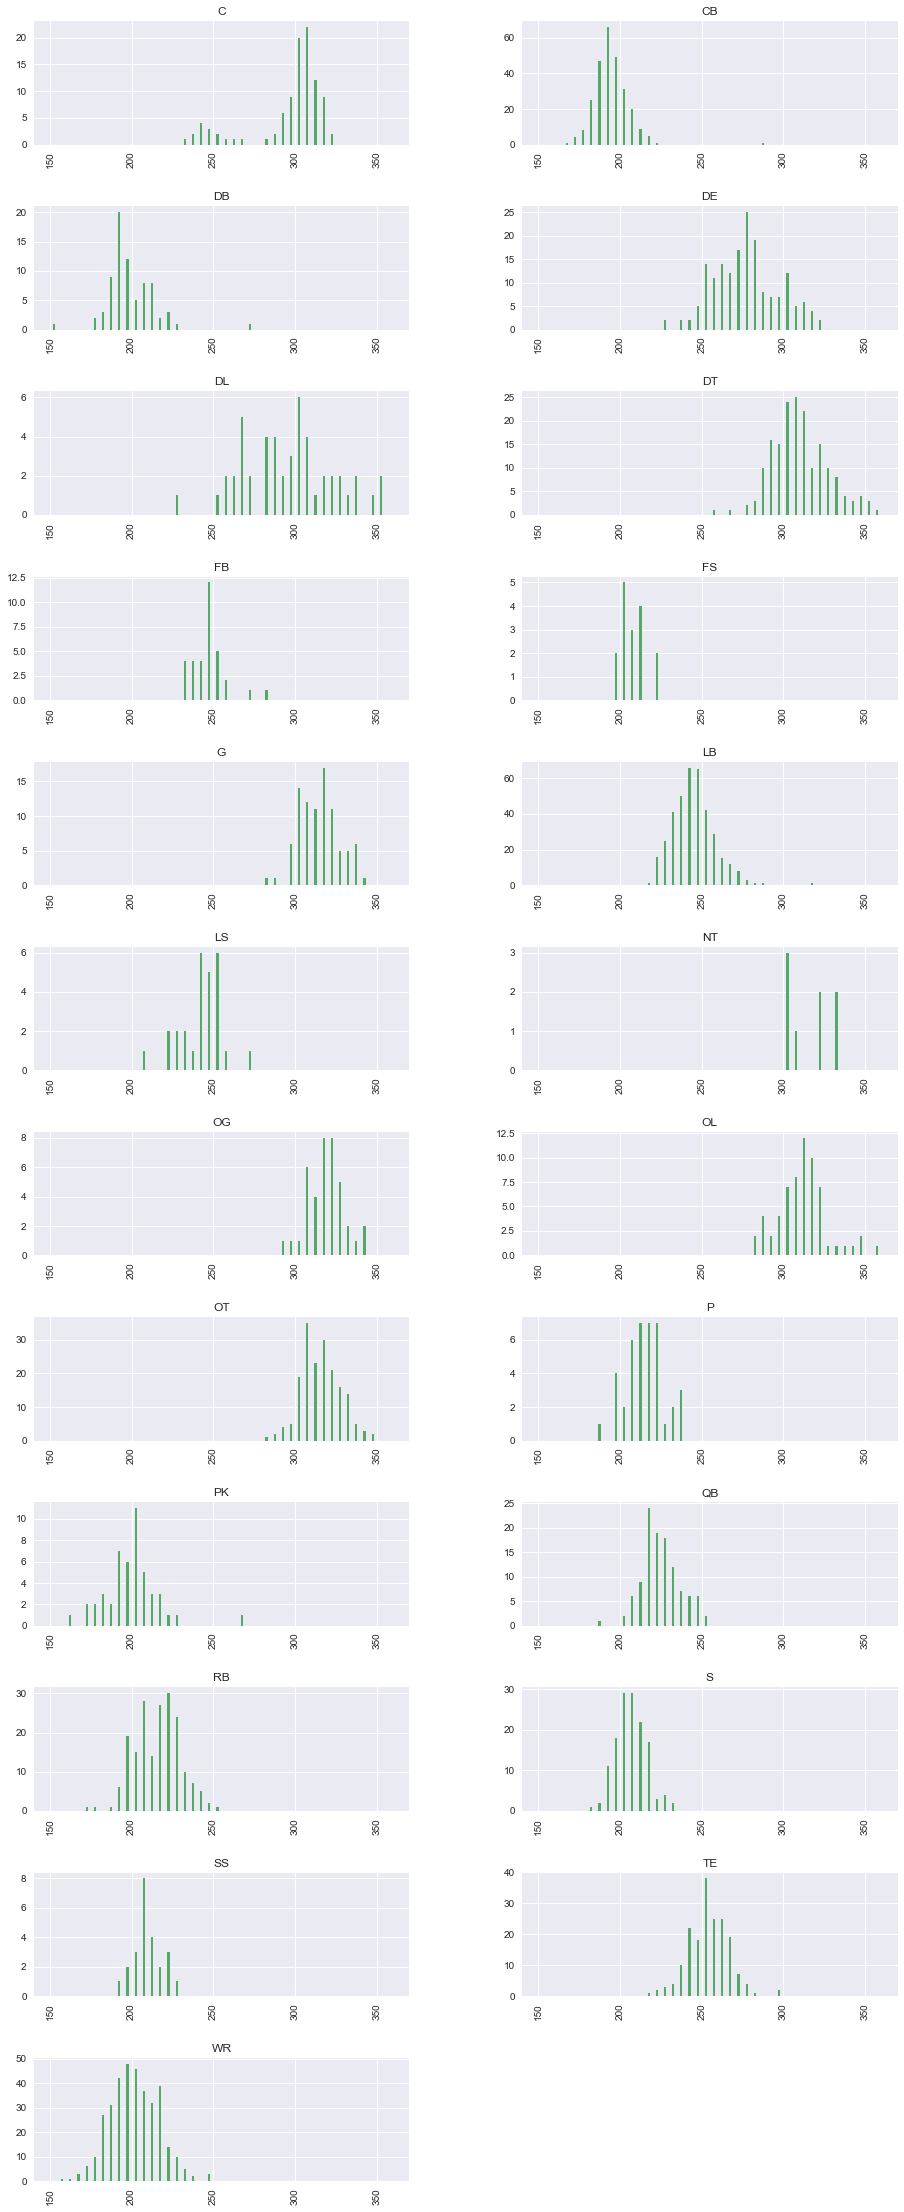

In [44]:
mpl.style.use('seaborn')
_ = nfl.hist(column = ['Weight'], by= ['Position'], figsize = (15, 40), 
                     layout = (12, 2), sharey = False, sharex = False,
                     bins = np.arange(150, 364, 5))

- As we can see in the histograms above, the distribution of weights among players of different positions changes. Therefore, yes, the distribution of weights depends on the position.

# The making of a popular song...

I'll use this music dataset to explore what goes into the making of a popular song.

https://think.cs.vt.edu/corgis/csv/music/music.html.

#### a) Understanding the data, cleaning...

In [46]:
music = pd.read_csv('/users/elizabeth/downloads/music.csv')
music.shape, music.columns

((10000, 35),
 Index(['artist.hotttnesss', 'artist.id', 'artist.name', 'artist_mbtags',
        'artist_mbtags_count', 'bars_confidence', 'bars_start',
        'beats_confidence', 'beats_start', 'duration', 'end_of_fade_in',
        'familiarity', 'key', 'key_confidence', 'latitude', 'location',
        'longitude', 'loudness', 'mode', 'mode_confidence', 'release.id',
        'release.name', 'similar', 'song.hotttnesss', 'song.id',
        'start_of_fade_out', 'tatums_confidence', 'tatums_start', 'tempo',
        'terms', 'terms_freq', 'time_signature', 'time_signature_confidence',
        'title', 'year'],
       dtype='object'))

In [47]:
music = music.rename(columns = {'terms' : 'genre'})

In [49]:
print(music.shape)
music.head(5)

(10000, 35)


,artist.hotttnesss,artist.id,artist.name,artist_mbtags,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,...,start_of_fade_out,tatums_confidence,tatums_start,tempo,genre,terms_freq,time_signature,time_signature_confidence,title,year
0,0.401998,ARD7TVE1187B99BFB1,Casual,NaN,0.0,0.643,0.58521,0.834,0.58521,218.93179,...,218.932,0.779,0.28519,92.198,hip hop,1.000000,4.0,0.778,I Didn't Mean To,0
1,0.417500,ARMJAGH1187FB546F3,The Box Tops,classic pop and rock,1.0,0.007,0.71054,1.000,0.20627,148.03546,...,137.915,0.969,0.20627,121.274,blue-eyed soul,1.000000,4.0,0.384,Soul Deep,1969
2,0.343428,ARKRRTF1187B9984DA,Sonora Santanera,NaN,0.0,0.980,0.73152,0.980,0.73152,177.47546,...,172.304,0.482,0.42132,100.070,salsa,1.000000,1.0,0.000,Amor De Cabaret,0
3,0.454231,AR7G5I41187FB4CE6C,Adam Ant,uk,1.0,0.017,1.30621,0.809,0.81002,233.40363,...,217.124,0.601,0.56254,119.293,pop rock,0.988584,4.0,0.000,Something Girls,1982
4,0.401724,ARXR32B1187FB57099,Gob,NaN,0.0,0.175,1.06368,0.883,0.13576,209.60608,...,198.699,1.000,0.13576,129.738,pop punk,0.887288,4.0,0.562,Face the Ashes,2007


In [50]:
#removing songs where song.hottnesss is 0 (outliers)
music = music[music['song.hotttnesss'] != 0]

#### b. Who are the top 10 artists in terms of artist hotness?

In [51]:
sorted_hot_artists = music.sort_values(['artist.hotttnesss'], ascending=False)
top10 = sorted_hot_artists['artist.name'].unique()[:10]

print('These are the top 10 artists by hotness:')
for x in top10:
    print(x)

These are the top 10 artists by hotness:
Kanye West
Kanye West / Adam Levine
Kanye West / Lupe Fiasco
Kanye West / Consequence / Cam'Ron
Daft Punk
Black Eyed Peas
Black Eyed Peas / Terry Dexter
Black Eyed Peas / Les Nubians / Mos Def
Taylor Swift
Coldplay


#### Which are the top 10 songs in terms of hotness?

In [52]:
song_hotness = music[['song.hotttnesss', 'artist.name', 'title']]
top_10_songs = song_hotness.sort_values('song.hotttnesss', ascending = False)[:10]
top_10_songs[['title', 'song.hotttnesss', 'artist.name']]

,title,song.hotttnesss,artist.name
9137,Immigrant Song (Album Version),1.000000,Led Zeppelin
6437,Nothin' On You [feat. Bruno Mars] (Album Version),1.000000,B.o.B
539,This Christmas (LP Version),0.997758,Donny Hathaway
7847,If Today Was Your Last Day (Album Version),0.984347,Nickelback
5699,Harder To Breathe,0.979837,Maroon 5
9724,Blue Orchid,0.972387,The White Stripes
3277,Just Say Yes,0.945995,Snow Patrol
6482,They Reminisce Over You (Single Version),0.932274,Pete Rock & C.L. Smooth
1354,Exogenesis: Symphony Part 1 [Overture],0.931346,Muse
7917,Inertiatic Esp,0.928617,The Mars Volta


- These are the top 10 songs in terms of hotness.

#### Investigating Tempo's Effect on Song Hotness.

In [53]:
music = music.dropna(subset = ['familiarity', 'song.hotttnesss'])

In [54]:
r = np.corrcoef(music['familiarity'], music['song.hotttnesss'])
r

array([[1.        , 0.50648738],
       [0.50648738, 1.        ]])

- the correlation coefficient r, 0.5439, tells us that there is a significant relationship between familiarity and song hotness.

In [55]:
m, b = np.polyfit(music['familiarity'], music['song.hotttnesss'], 1)

Text(0,0.5,'hotness')

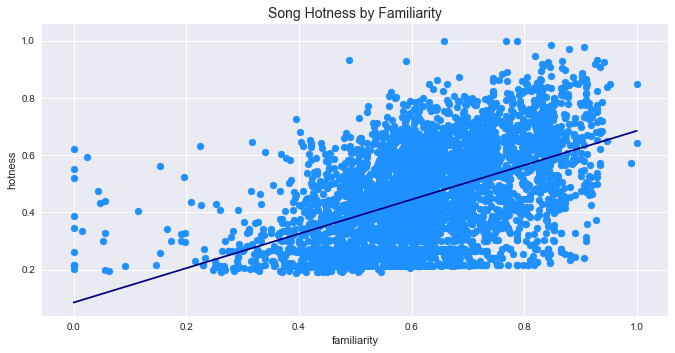

In [56]:
plt.figure(figsize=(10,5))

plt.scatter(music['familiarity'], music['song.hotttnesss'], color = 'dodgerblue')

#regression line
xvals = np.arange(0, 1.1, 0.1)
yvals = m * xvals + b 
plt.plot(xvals, yvals, color = 'navy')
plt.title('Song Hotness by Familiarity', size = 'medium')
plt.xlabel('familiarity')
plt.ylabel('hotness')

- The scatterplot shows that higher familiarity is significantly correlated with more popular songs; in general, the higher the familiarity, the hotter the song should be. This may be because people like to listen to songs over and over, familiar songs are catchy and easy to sing along to. 

#### Looking at Duration's Effect on Song Hotness.


In [57]:
music = music.dropna(subset = ['duration', 'song.hotttnesss'])

In [58]:
#removing that one nasty outlier song that lasted over 2,050 

In [59]:
cleaned_music = music[music['duration'] < np.max(music['duration'])]

In [60]:
r = np.corrcoef(cleaned_music['duration'], cleaned_music['song.hotttnesss'])
r

array([[ 1.00000000e+00, -4.76161607e-05],
       [-4.76161607e-05,  1.00000000e+00]])

Text(0,0.5,'hotness')

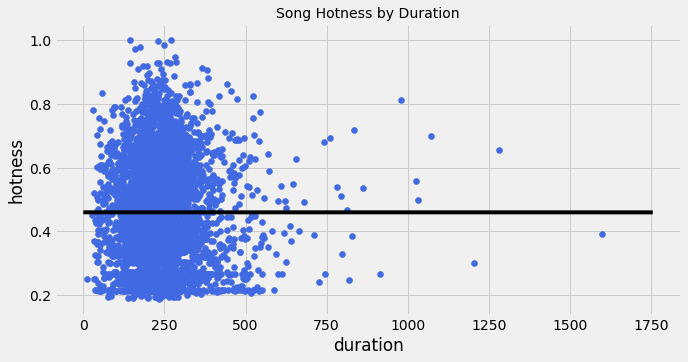

In [476]:
plt.figure(figsize=(10,5))

m, b = np.polyfit(cleaned_music['duration'], cleaned_music['song.hotttnesss'], 1)
plt.scatter(cleaned_music['duration'], cleaned_music['song.hotttnesss'], color = 'royalblue')
#regression line
xvals = np.arange(0, 1760, 5)
yvals = m * xvals + b 
plt.plot(xvals, yvals, color = 'k')
plt.title('Song Hotness by Duration', size = 'medium')
plt.xlabel('duration')
plt.ylabel('hotness')

- The scatter plot shows that as song duration increases past 750, there are fewer songs with high hotness. This is probably because people have short attention spans and like music in the 3 - 4 minute range; 30 minute songs are too long to hit the popular charts.

#### Key's Effect on Song Hotness?

Does the key of a song affect it's hotness?

In [61]:
music = music.dropna(subset = ['key', 'song.hotttnesss'])

In [62]:
r = np.corrcoef(music['key'], music['song.hotttnesss'])
r

array([[1.        , 0.00792963],
       [0.00792963, 1.        ]])

In [63]:
#removing that one nasty outlier key:

In [64]:
cleaned_music = music[music['key'] < np.max(music['key'])]

In [65]:
r = np.corrcoef(cleaned_music['key'], cleaned_music['song.hotttnesss'])
r

array([[1.        , 0.00123805],
       [0.00123805, 1.        ]])

- The correlation coefficient 0.001238 tells us that there is basically no linear relationship between key and song hottness.

Text(0,0.5,'hotness')

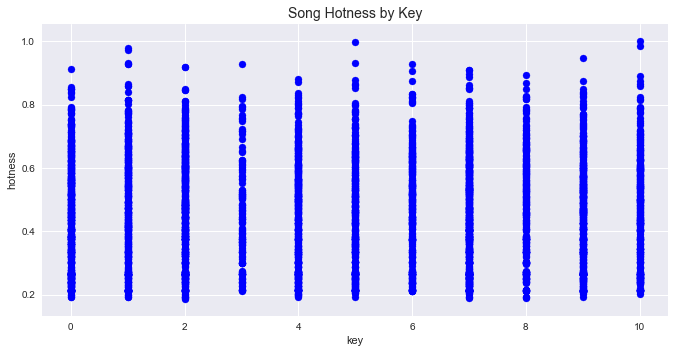

In [66]:
plt.figure(figsize=(10,5))

m, b = np.polyfit(cleaned_music['key'], cleaned_music['song.hotttnesss'], 1)
plt.scatter(cleaned_music['key'], cleaned_music['song.hotttnesss'], color = 'blue')
#regression line
xvals = np.arange(0, 10, 5)
yvals = m * xvals + b 
plt.title('Song Hotness by Key', size = 'medium')
plt.xlabel('key')
plt.ylabel('hotness')

- The scatter plot shows that there is generally an even distribution of hot songs by key. Therefore key has very little to no influence on the song's hotness.

#### Loudness' Effect on Song Hotness.


In [67]:
music = music.dropna(subset = ['loudness', 'song.hotttnesss'])

In [68]:
r = np.corrcoef(music['loudness'], music['song.hotttnesss'])
r

array([[1.        , 0.21084245],
       [0.21084245, 1.        ]])

- the correlation coefficient r, 0.22587, tells us that there is a very slight linear relationship between song loudness and song hotness.

Text(0,0.5,'hotness')

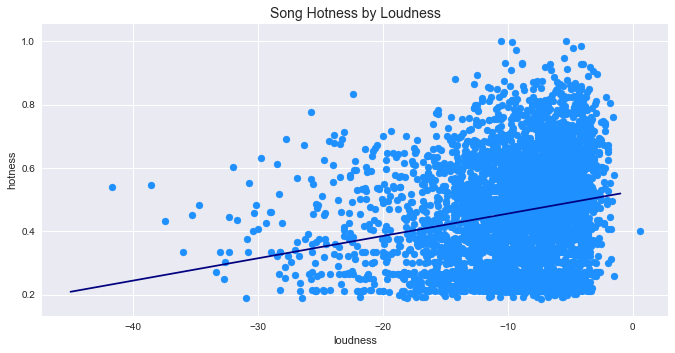

In [69]:
plt.figure(figsize=(10,5))

m, b = np.polyfit(music['loudness'], music['song.hotttnesss'], 1)
plt.scatter(music['loudness'], music['song.hotttnesss'], color = 'dodgerblue')
#regression line
xvals = np.arange(-45, 0, 1)
yvals = m * xvals + b 
plt.plot(xvals, yvals, color = 'navy')

plt.title('Song Hotness by Loudness', size = 'medium')
plt.xlabel('loudness')
plt.ylabel('hotness')

- The scatter plot shows that the number of hot songs is concentrated around louder songs;  loudness has somewhat of an influence on the song's hotness. This might be because loud songs are popular among young adults for dancing.

In [70]:
music.columns

Index(['artist.hotttnesss', 'artist.id', 'artist.name', 'artist_mbtags',
       'artist_mbtags_count', 'bars_confidence', 'bars_start',
       'beats_confidence', 'beats_start', 'duration', 'end_of_fade_in',
       'familiarity', 'key', 'key_confidence', 'latitude', 'location',
       'longitude', 'loudness', 'mode', 'mode_confidence', 'release.id',
       'release.name', 'similar', 'song.hotttnesss', 'song.id',
       'start_of_fade_out', 'tatums_confidence', 'tatums_start', 'tempo',
       'genre', 'terms_freq', 'time_signature', 'time_signature_confidence',
       'title', 'year'],
      dtype='object')

#### Artist's hotness on song's hotness

In [71]:
music = music.dropna(subset = ['artist.hotttnesss', 'song.hotttnesss'])

In [72]:
r = np.corrcoef(music['artist.hotttnesss'], music['song.hotttnesss'])
r

array([[1.        , 0.48418566],
       [0.48418566, 1.        ]])

- The correlation coefficient r = 0.5223 shows that there is a relatively strong linear relationship between an artist's hotness and the song's hotness.

Text(0,0.5,'song hotness')

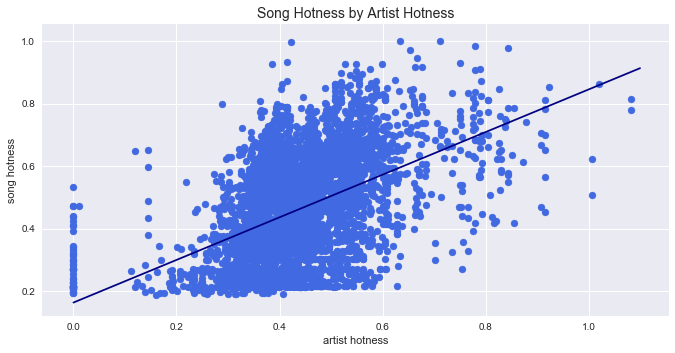

In [73]:
plt.figure(figsize=(10,5))

m, b = np.polyfit(music['artist.hotttnesss'], music['song.hotttnesss'], 1)
plt.scatter(music['artist.hotttnesss'], music['song.hotttnesss'], color = 'royalblue')
#regression line
xvals = np.arange(0, 1.2, .1)
yvals = m * xvals + b 
plt.plot(xvals, yvals, color = 'navy')

plt.title('Song Hotness by Artist Hotness', size = 'medium')
plt.xlabel('artist hotness')
plt.ylabel('song hotness')

- The scatterplot shows that there is a considerable relationship between an artist's hotness and their song's hotness. An explanation: the hotter an artist is, the larger their fanbase is. The larger the fanbase, the larger potential receptive audience for the song which means higher hotness.

#### Creating a multivariable linear regression model that helps predict song hotness!

In [74]:
import statsmodels.api as sm

In [75]:
# create a df of the independent variables
X = music[['artist.hotttnesss', 'familiarity', 'loudness']]
# dependent variable. what are we predicting?
y = music['song.hotttnesss']

#we are fitting y = ax_1 + bx_2+ c and not just ax_1 + bx_2
X = sm.add_constant(X) 
# OLS - ordinary least squares.
# best possible hyperplane through the data
# best = minimize sum of square distances
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        song.hotttnesss   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     556.2
Date:                Wed, 19 Dec 2018   Prob (F-statistic):          1.77e-304
Time:                        18:50:15   Log-Likelihood:                 2235.4
No. Observations:                4214   AIC:                            -4463.
Df Residuals:                    4210   BIC:                            -4437.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1273      0.012     10.693      0.000       0.104       0.151
artist.hotttnesss     0.3121      0.030     10.367      0.000       0.253       0.371
familiarity           0.3652      0.026     14.274      0.000       0.315       0.415
loudness              0.0032      0.000      7.214      0.000       0.002       0.004
==============================================================================
Omnibus:                       52.849   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.264
Skew:                           0.139   Prob(JB):                     2.98e-09
Kurtosis:                       2.617   Cond. No.                         186.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### - The model is:

##### predicted song hotness = 0.1273 + 0.3121x  + 0.3652y + 0.0032z  

.... where x is the song artist's hotness, y is the song's familiarity, and z is the song's loudness.

# Building a regression model to predict bodyfat

In [76]:
bodyfat = pd.read_excel('/users/elizabeth/downloads/BodyFat.xls')

In [77]:
bodyfat.head()

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [78]:
def correlation(df, x, y):
    # r = avg(standardize(x) * standardize(y))
    x_std = standardize(df[x])
    y_std = standardize(df[y])
    return np.mean(x_std * y_std)

In [79]:
# The variables below have significant correlations with bodyfat
print(correlation(bodyfat, 'BODYFAT', 'WEIGHT'))
print(correlation(bodyfat, 'BODYFAT', 'DENSITY'))
print(correlation(bodyfat, 'BODYFAT', 'ADIPOSITY'))
print(correlation(bodyfat, 'BODYFAT', 'CHEST'))
print(correlation(bodyfat, 'BODYFAT', 'ABDOMEN'))
print(correlation(bodyfat, 'BODYFAT', 'HIP'))
print(correlation(bodyfat, 'BODYFAT', 'THIGH'))

0.6131561100313141
-0.9880867267228655
0.7279941849205852
0.7028851557124898
0.8137062216427914
0.6256999272610364
0.561284376117438


#### Making the linear regression model for bodyfat

In [80]:
# create a df of the independent variables
X = bodyfat[['WEIGHT', 'DENSITY', 'ADIPOSITY', 'CHEST', 'ABDOMEN', 'HIP', 'THIGH']]
# dependent variable. what are we predicting?
y = bodyfat['BODYFAT']

X = sm.add_constant(X) 
# OLS - ordinary least squares.
# best possible hyperplane through the data
# best = minimize sum of square distances
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BODYFAT   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1566.
Date:                Wed, 19 Dec 2018   Prob (F-statistic):          8.44e-199
Time:                        18:51:40   Log-Likelihood:                -390.94
No. Observations:                 252   AIC:                             797.9
Df Residuals:                     244   BIC:                             826.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        415.1138      8.992     46.162      0.000     397.401     432.827
WEIGHT        -0.0033      0.010     -0.332      0.740      -0.023       0.016
DENSITY     -381.1288      7.164    -53.202      0.000    -395.240    -367.018
ADIPOSITY     -0.0422      0.065     -0.646      0.519      -0.171       0.086
CHEST          0.0338      0.028      1.202      0.230      -0.022       0.089
ABDOMEN        0.0428      0.027      1.596      0.112      -0.010       0.096
HIP            0.0214      0.037      0.573      0.567      -0.052       0.095
THIGH         -0.0285      0.034     -0.834      0.405      -0.096       0.039
==============================================================================
Omnibus:                      378.512   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117673.663
Skew:                           6.831   Prob(JB):                         0.00
Kurtosis:                     107.978   Cond. No.                     3.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### - The model is:

##### predicted bodyfat = 415.1138 - 0.0033x - 381.1288y - 0.0422z + 0.0338a + 0.0428b + 0.0214c - 0.0285d

.... where x is the weight, y is the density, and z is the adiposity, a is the chest size, b is the abdomen size, c is the hip size, and d is the thigh size.